In [1]:
import numpy as np
import seaborn as sb 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

In [2]:
data_exp = pd.read_csv('2010_2021_HS2_export.csv')
data_imp = pd.read_csv('2010_2021_HS2_import.csv')

In [3]:
print("Preview of export data:")
display(data_exp.sample(n=10))
# data.head()

print("Preview of import data:")
display(data_imp.sample(n=10))

Preview of export data:


,HSCode,Commodity,value,country,year
36518,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",2.23,KOREA RP,2012
112308,93,ARMS AND AMMUNITION; PARTS AND ACCESSORIES THE...,0.78,ITALY,2017
137278,30,PHARMACEUTICAL PRODUCTS,0.00,ANDORRA,2019
84808,87,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,0.63,NEW CALEDONIA,2015
132571,65,HEADGEAR AND PARTS THEREOF.,0.13,PORTUGAL,2018
34219,61,"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, ...",0.04,GAMBIA,2012
38361,39,PLASTIC AND ARTICLES THEREOF.,NaN,MONTSERRAT,2012
105457,9,"COFFEE, TEA, MATE AND SPICES.",0.16,ZAMBIA,2016
140028,68,"ARTICLES OF STONE, PLASTER, CEMENT, ASBESTOS, ...",3.35,COLOMBIA,2019
112845,83,MISCELLANEOUS ARTICLES OF BASE METAL.,0.01,KOREA DP RP,2017


Preview of import data:


,HSCode,Commodity,value,country,year
82261,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.65,SRI LANKA DSR,2019
90657,58,SPECIAL WOVEN FABRICS; TUFTED TEXTILE FABRICS;...,0.10,SLOVAK REP,2020
10922,96,MISCELLANEOUS MANUFACTURED ARTICLES.,0.00,GREECE,2011
45393,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",311.26,KOREA RP,2015
60206,87,VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING...,0.24,ESTONIA,2017
20450,73,ARTICLES OF IRON OR STEEL,0.01,JORDAN,2012
54595,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.52,MYANMAR,2016
66463,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",0.01,AFGHANISTAN,2018
85855,81,OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,0.01,DENMARK,2020
13636,37,PHOTOGRAPHIC OR CINEMATOGRAPHIC GOODS.,0.01,NORWAY,2011


In [4]:
def description(df):
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

print("Variable discription of export data:")
display(description(data_exp))

print("Variable discription of import data:")
display(description(data_imp))

Variable discription of export data:


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,2,3,4
1,Commodity,object,0,98,MEAT AND EDIBLE MEAT OFFAL.,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...
2,value,float64,19258,12944,1.4,0.08,3.89
3,country,object,0,249,AFGHANISTAN,AFGHANISTAN,AFGHANISTAN
4,year,int64,0,12,2010,2010,2010


Variable discription of import data:


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,HSCode,int64,0,98,7,8,9
1,Commodity,object,0,98,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,"COFFEE, TEA, MATE AND SPICES."
2,value,float64,15745,11062,9.14,93.82,2.54
3,country,object,0,243,AFGHANISTAN,AFGHANISTAN,AFGHANISTAN
4,year,int64,0,12,2010,2010,2010


In [5]:
print("Export data with zero values:")
display(data_exp[data_exp.value == 0].head(5))

print("Export data with NAN:")
display(data_exp.isnull().sum())

print("Import data with zero values:")
display(data_imp[data_imp.value == 0].head(5))

print("Import data with NAN:")
display(data_imp.isnull().sum())

Export data with zero values:


,HSCode,Commodity,value,country,year
14,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.0,AFGHANISTAN,2010
21,23,RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; P...,0.0,AFGHANISTAN,2010
31,35,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,0.0,AFGHANISTAN,2010
55,65,HEADGEAR AND PARTS THEREOF.,0.0,AFGHANISTAN,2010
56,66,"UMBRELLAS, SUN UMBRELLAS, WALKING-STICKS, SEAT...",0.0,AFGHANISTAN,2010


Export data with NAN:


HSCode           0
Commodity        0
value        19258
country          0
year             0
dtype: int64

Import data with zero values:


,HSCode,Commodity,value,country,year
5,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.0,AFGHANISTAN,2010
6,18,COCOA AND COCOA PREPARATIONS.,0.0,AFGHANISTAN,2010
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN,2010
17,58,SPECIAL WOVEN FABRICS; TUFTED TEXTILE FABRICS;...,0.0,AFGHANISTAN,2010
18,63,OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLO...,0.0,AFGHANISTAN,2010


Import data with NAN:


HSCode           0
Commodity        0
value        15745
country          0
year             0
dtype: int64

In [6]:
data_exp = data_exp.dropna()
data_exp['country'] = data_exp['country'].replace({'U S A' : 'USA'})
data_exp = data_exp.reset_index(drop=True)

data_imp = data_imp.dropna()
data_imp['country'] = data_imp['country'].replace({'U S A' : 'USA'})
data_imp = data_imp.reset_index(drop=True) 

In [7]:
export_year = data_exp.groupby('year').agg({'value' : 'sum'})
export_year = export_year.rename(columns={'value' : 'Export'})

import_year = data_imp.groupby('year').agg({'value' : 'sum'})
import_year = import_year.rename(columns={'value' : 'Import'})

export_year['Growth Rate(E)'] = export_year.pct_change()
import_year['Growth Rate(I)'] = import_year.pct_change()

total_year = pd.concat([export_year, import_year], axis = 1)
total_year['Trade Deficit'] = export_year.Export - import_year.Import

print('Export/Import and Trade Balance of India')
display(total_year)
print('Descriptive statistics')
display(total_year.describe())

Export/Import and Trade Balance of India


,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
year,,,,,
2010,249801.18,NaN,369762.25,NaN,-119961.07
2011,305948.28,0.224767,489311.81,0.323315,-183363.53
2012,300384.32,-0.018186,490730.07,0.002898,-190345.75
2013,314388.61,0.046621,450192.99,-0.082606,-135804.38
2014,310321.02,-0.012938,448026.63,-0.004812,-137705.61
2015,262274.30,-0.154829,381000.97,-0.149602,-118726.67
2016,275835.27,0.051705,384350.29,0.008791,-108515.02
2017,303507.85,0.100323,465574.02,0.211327,-162066.17
2018,330058.64,0.087480,514071.33,0.104167,-184012.69


Descriptive statistics


,Export,Growth Rate(E),Import,Growth Rate(I),Trade Deficit
count,12.000000,11.000000,12.000000,11.000000,12.000000
mean,306636.203333,0.059246,456266.375000,0.065641,-149630.171667
std,43052.939353,0.162889,69331.700692,0.219915,33102.919639
min,249801.180000,-0.154829,369762.250000,-0.169101,-191061.040000
25%,287800.912500,-0.034418,391909.307500,-0.079595,-183525.820000
50%,304728.065000,0.046621,457883.505000,0.002898,-149533.110000
75%,313603.007500,0.093901,489666.375000,0.157747,-119652.470000
max,421984.370000,0.446195,613045.410000,0.554261,-102639.520000


In [8]:
trace1 = go.Bar(
    x = total_year.index,
    y = total_year.Export,
    name = "Export",
    marker = dict(color = 'rgb(55, 83, 109)', line = dict(color = 'rgb(0, 0, 0)', width = 1.5)),
    text = total_year.Export
)

trace2 = go.Bar(
    x = total_year.index,
    y = total_year.Import,
    name = "Import",
    marker = dict(color = 'rgb(26, 118, 255)', line = dict(color = 'rgb(0, 0, 0)', width = 1.5)),
    text = total_year.Import
)

layout = go.Layout(
    hovermode= 'closest', 
    title = 'Export/Import of Indian Trade from 2010 to 2021' ,
    xaxis = dict(title = 'Year'), 
    yaxis = dict(title = 'USD (millions)')
)
fig = go.Figure(data = [trace1,trace2], layout = layout)
fig.show()

In [9]:
trace1 = go.Scatter(
    x = total_year.index,
    y = total_year['Growth Rate(E)'],
    name = "Growth Rate(E)",
    line_color = 'deepskyblue',
    opacity = 0.8,
    text = total_year['Growth Rate(E)']
)

trace2 = go.Scatter(
    x = total_year.index,
    y = total_year['Growth Rate(I)'],
    name = "Growth Rate(I)",
    line_color = 'dimgray',
    opacity = 0.8,
    text = total_year['Growth Rate(I)']
)

layout = go.Layout(
    hovermode = 'closest',
    title = 'Export/Import Growth Rate of Indian Trade from 2010 to 2021',
    xaxis = dict(title = 'Year'),
    yaxis = dict(title = 'Growth Rate'),
)
fig = go.Figure(data = [trace1,trace2], layout=layout)
fig.show()

In [10]:
trace1 = go.Bar(
    x = total_year.index,
    y = total_year.Export,
    name = 'Export',
    marker = dict(color = 'rgb(55, 83, 109)', line = dict(color = 'rgb(0, 0, 0)', width = 1.5)),
    text = total_year.Export
)

trace2 = go.Bar(
    x = total_year.index,
    y = total_year.Import,
    name = 'Import',
    marker = dict(color = 'rgb(26, 118, 255)', line = dict(color = 'rgb(0, 0, 0)', width = 1.5)),
    text = total_year.Import
)

trace3 = go.Bar(
    x = total_year.index,
    y = total_year['Trade Deficit'],
    name = 'Trade Deficit',
    marker = dict(color = 'red', line = dict(color = 'rgb(0, 0, 0)', width = 1.5)),
    text = total_year['Trade Deficit']
)

layout = go.Layout(
    hovermode = 'closest',
    title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2021',
    xaxis = dict(title = 'Year'),
    yaxis = dict(title = 'USD (millions)'),
)
fig = go.Figure(data = [trace1,trace2,trace3], layout=layout)
fig.show()

In [11]:
print('Total number of Export commodity:', data_exp['Commodity'].nunique())
print('Total number of Import commodity:', data_imp['Commodity'].nunique())

Total number of Export commodity: 98
Total number of Import commodity: 98


In [12]:
print('Most Exporting Commodities(In Numbers) from 2010 to 2021\n')
display(pd.DataFrame(data_exp['Commodity'].value_counts().head(20)))

print('\n')

print('Most Importing Commodities(In Numbers) from 2010 to 2021\n')
display(pd.DataFrame(data_imp['Commodity'].value_counts().head(20)))

Most Exporting Commodities(In Numbers) from 2010 to 2021



,count
Commodity,
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",2537
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",2514
PHARMACEUTICAL PRODUCTS,2513
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",2488
PLASTIC AND ARTICLES THEREOF.,2435
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",2421
ARTICLES OF IRON OR STEEL,2401
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",2400
OTHER MADE UP TEXTILE ARTICLES; SETS; WORN CLOTHING AND WORN TEXTILE ARTICLES; RAGS,2395




Most Importing Commodities(In Numbers) from 2010 to 2021



,count
Commodity,
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",2081
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1970
IRON AND STEEL,1828
ALUMINIUM AND ARTICLES THEREOF.,1716
PLASTIC AND ARTICLES THEREOF.,1712
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1626
COPPER AND ARTICLES THEREOF.,1498
ARTICLES OF IRON OR STEEL,1460
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,1396


In [13]:
exp_comm = data_exp.groupby('Commodity').agg({'value' : 'sum'})
exp_comm = exp_comm.sort_values(by = 'value', ascending = False)
exp_comm = exp_comm[:20]

imp_comm = data_imp.groupby('Commodity').agg({'value' : 'sum'})
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm = imp_comm[:20]

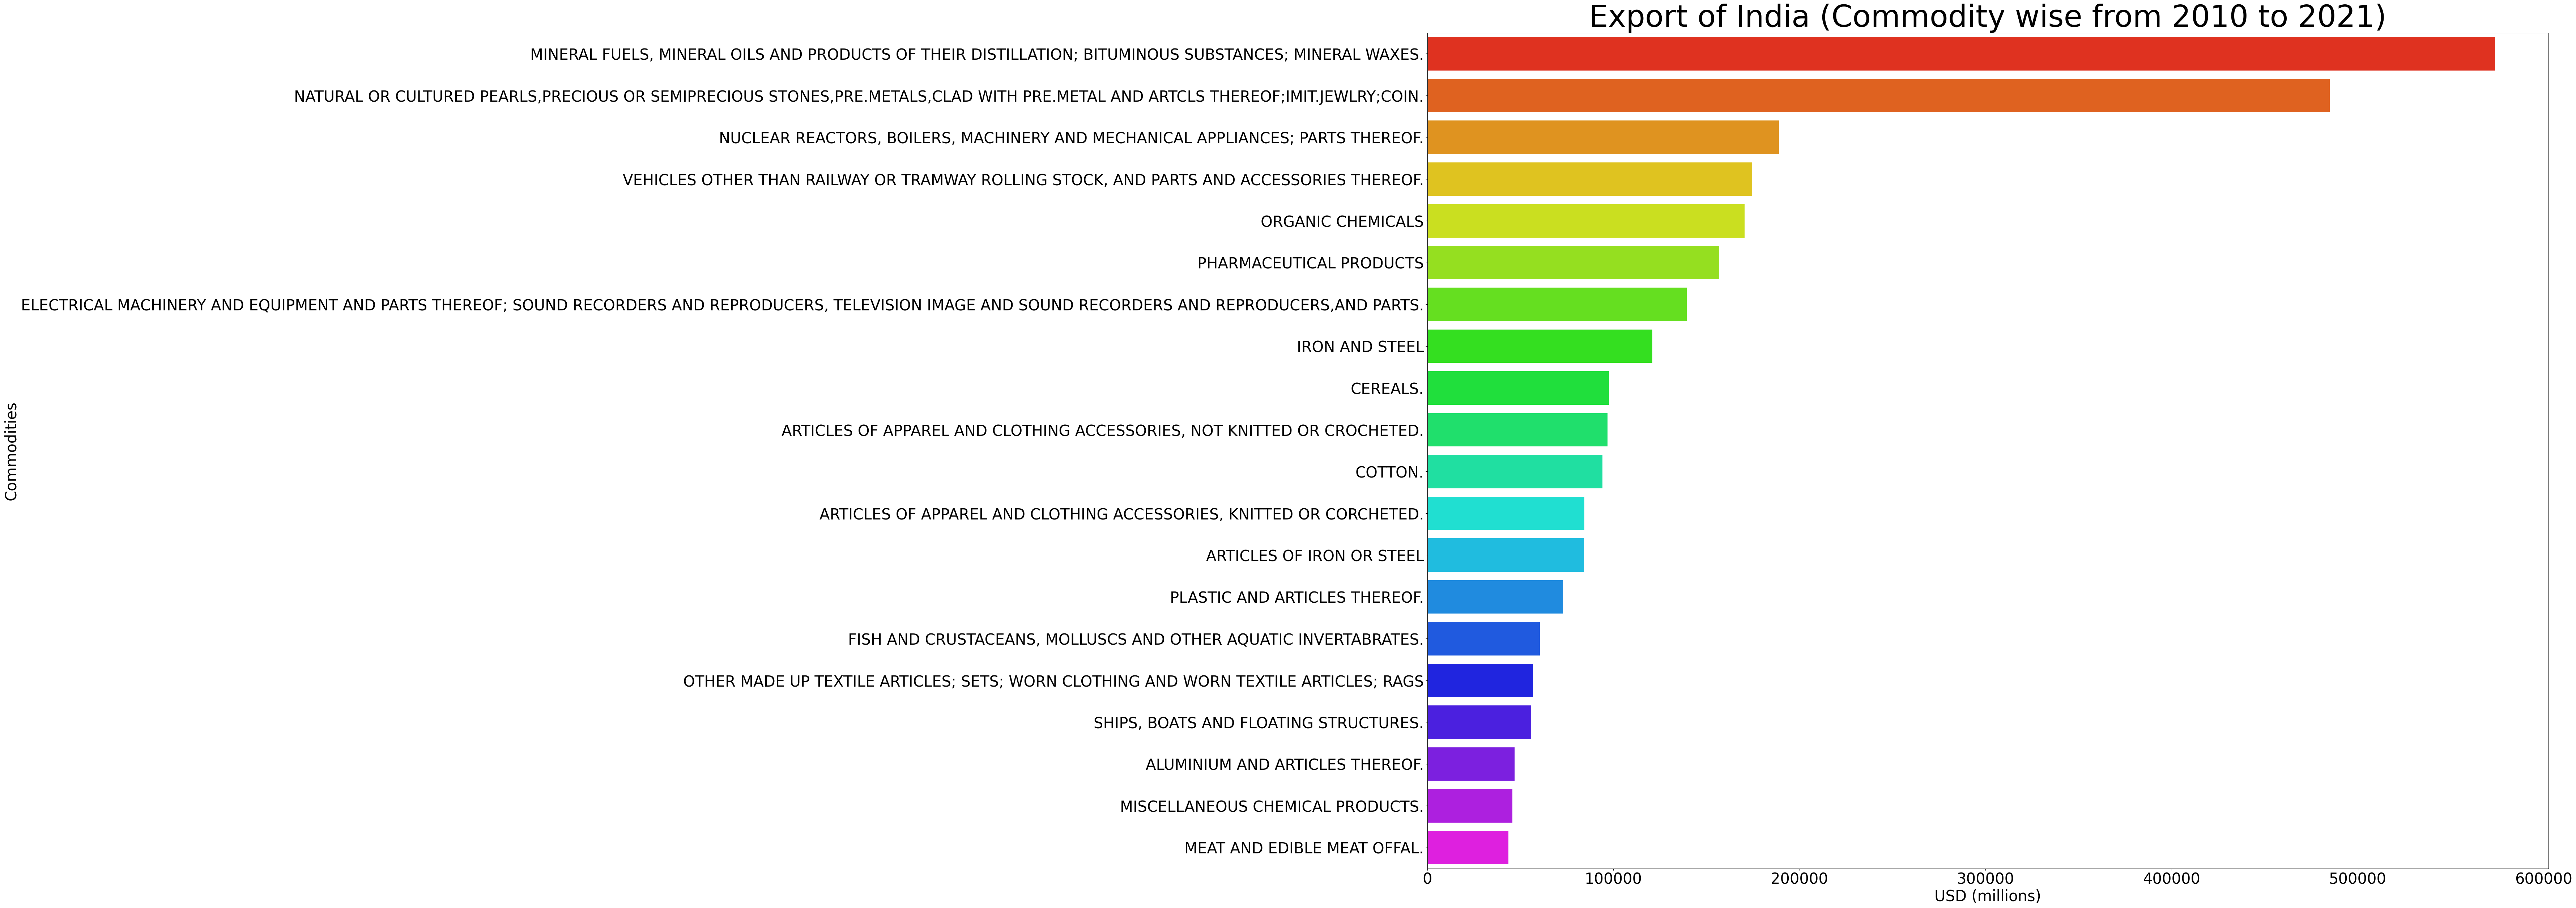

In [14]:
def bar_plot(x, y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40, 30)
    ax = sb.barplot(x = exp_comm.value, y = exp_comm.index, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.show()
    
bar_plot(exp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Export of India (Commodity wise from 2010 to 2021)', 'gist_rainbow')

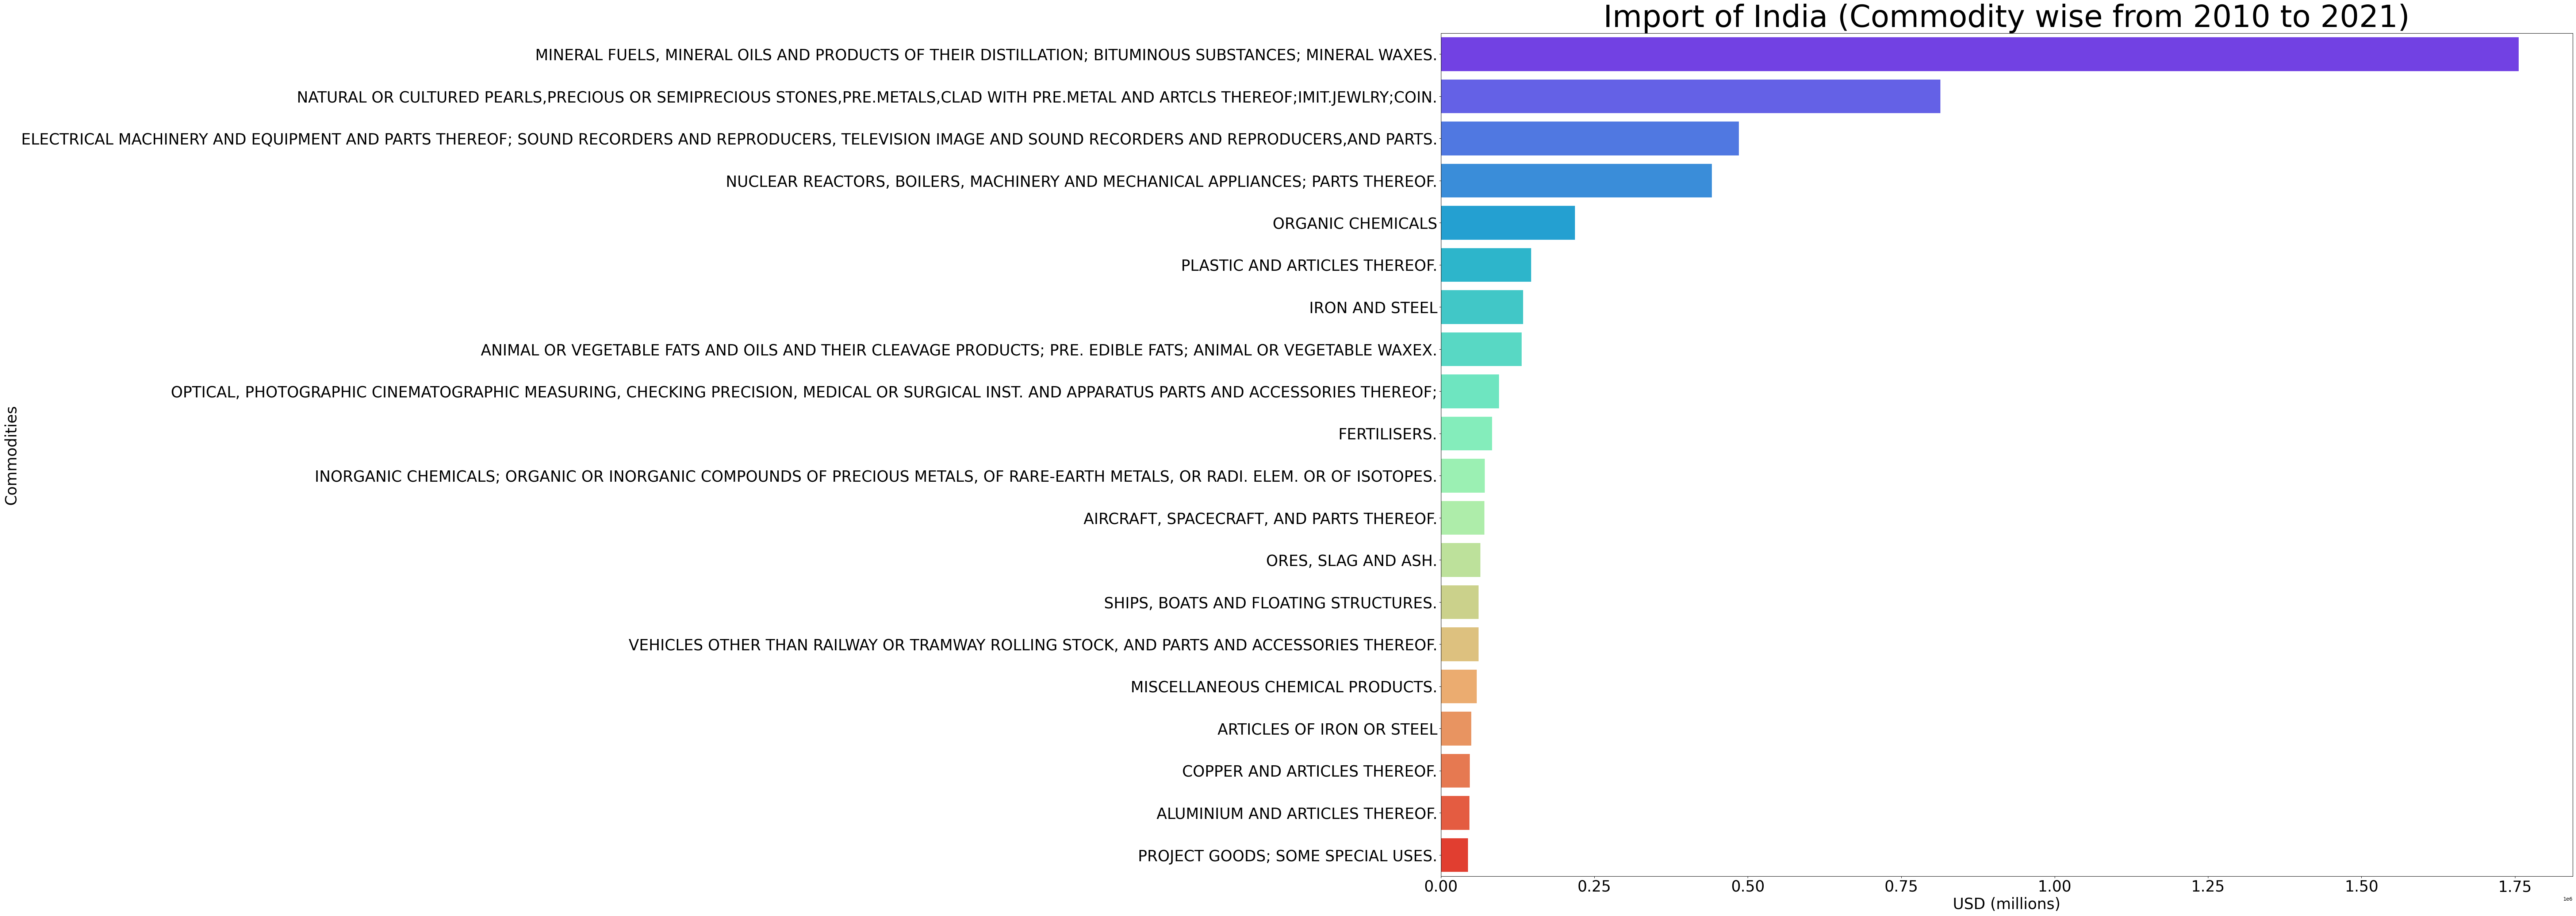

In [15]:
def bar_plot(x, y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40, 30)
    ax = sb.barplot(x = imp_comm.value, y = imp_comm.index, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30)
    plt.show()
    
bar_plot(imp_comm.value, imp_comm.index, 'USD (millions)', 'Commodities', 'Import of India (Commodity wise from 2010 to 2021)', 'rainbow')